## Web scrapping behind authentication

Web scrapping of a private GitHub repository with `requests` and `Beautiful Soup`.

### 1. First steps <hr>

In [1]:
import requests
from bs4 import BeautifulSoup

### 2. Getting data <hr>

We need to know two things:
1. The `URL` to which the POST request (sign in) will be sent.
2. The payload, or data that will be sent.

How?
1. Clear all the data from the _network_ tab in the developer tools and sign in.
2. Go to _session_ and save the URL. In this case: https://github.com/session


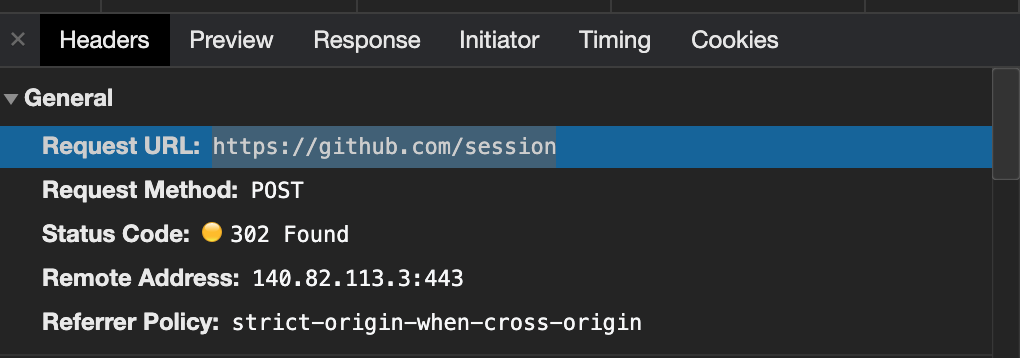

In [2]:
url = "https://github.com/session"

# Create the session object
s = requests.Session()

response = s.post(url)

In [3]:
response

<Response [403]>

*It doesn't work*. We need to pass it more information.
Go to the network tab again and right click to _session_, then _copy_, and then _copy as cURL_.

You can paste it into this website: https://curl.trillworks.com/, to get the request written in Python.

From that request we need two things: `the cookies and the data`.

In [4]:
# Complete this with your personal session data.

cookies = {
    '_octo': 'GH1.1.1771617955.1605046742',
    '_device_id': 'ca5fa77b5c372358e827264f63e5667c',
    '_ga': 'GA1.2.1281079183.1605620213',
    'has_recent_activity': '1',
    'tz': 'America%2FCordoba',
    'logged_in': 'no',
    '_gh_sess': '4v91NgFtQWUizVe4whvdtC6UHiaBQyTfBiP6p42AzULcAVh6HCX0oAVUpJ9ekN4lxTAI38N4VkV0bFvcehk7HIfYUBuqRKzhjLMZAi0svoxhFawAW2sh7ofbE9wv4iDQ57IZ%2B2fOl0bWmP4BsrZyETxy1A8z16YLzAEoDwUxiyzYQVc%2FAiSm%2B0XCpTk7z8cWFDSABKgEHUU0b47GcJW06FSiiPU45trt5aLseUdBbe4TZwUIpObC7VP7A4NlvQHaLWGl9fYVU9dR4gsYFzgGqQ%3D%3D--FrWQs8fjekn0CF47--zqc2vPPt7P2fqYlcQce%2Fag%3D%3D',
}

headers = {
    'Connection': 'keep-alive',
    'Cache-Control': 'max-age=0',
    'Upgrade-Insecure-Requests': '1',
    'Origin': 'https://github.com',
    'Content-Type': 'application/x-www-form-urlencoded',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.67 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-User': '?1',
    'Sec-Fetch-Dest': 'document',
    'Referer': 'https://github.com/login',
    'Accept-Language': 'es-419,es;q=0.9',
}

data = {
  'commit': 'Sign in',
  'authenticity_token': 'j+aaQ0q3jfRuvpHPeLpWZJEBC16tUUq6ppkLifW7v3DEhtdq5QQTJX/95vCL/rKCxgpyfNrL0V7po3ENTpPGhg==',
  'ga_id': '',
  'login': 'ursulamartini1@gmail.com',
  'password': '03434975252paw',
  'webauthn-support': 'supported',
  'webauthn-iuvpaa-support': 'unsupported',
  'return_to': '',
  'allow_signup': '',
  'client_id': '',
  'integration': '',
  'required_field_cbd7': '',
  'timestamp': '1606574990197',
  'timestamp_secret': 'e54ec90629cc0f0a4f448a3af759bc5e8110de2b7ad20974ccf08bf89cada18f'
}

s = requests.Session()

response = requests.post('https://github.com/session', headers=headers, cookies=cookies, data=data)

In [5]:
# Complete this with your personal session data.

cookies = {
    #...
}

headers = {
    #...
}

data = {
    #...
}

s = requests.Session()

response = requests.post('https://github.com/session', headers=headers, cookies=cookies, data=data)

Now we're signed in. Let's request something from a repository.

I choosed this one because is a `private repository`.

In [6]:
s = requests.Session()

s.post('https://github.com/session', data=data, cookies=cookies, headers=headers)
result = s.get("https://github.com/paulawoloszyn/php_login")
result

<Response [404]>

It worked! Now let's scrap something.


### 3. Scrapping <hr>

We'll start using the Beautiful Soup library. We already have in the 'result' variable the content of our page. 

In [7]:
# Save the content of the website on a new variable.

content = result.content

# And create the soup.

soup = BeautifulSoup(content)

# print(soup.prettify())

Some example of scrapping, to check if we are on the website.

In [8]:
samples = soup.find_all("h2")
# print(samples)

In [9]:
for a in samples:
    a = a.get_text().strip()
    print(a)

Product
Platform
Support
Company
